In [25]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import joblib
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('diabetes_dataset.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [4]:
df.tail()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
9533,32,3,23.00,102.3,62.0,4.1,109.3,47.8,76.7,86.8,115.0,0.75,0,0,0,0,0
9534,74,0,24.29,125.8,93.0,5.3,95.8,66.6,103.7,90.1,94.3,0.96,1,0,0,1,1
9535,75,6,26.10,107.6,75.0,5.0,168.5,62.3,149.8,84.0,114.9,0.73,0,0,0,1,0
9536,52,1,25.88,99.3,96.0,4.6,70.0,48.4,122.9,97.5,88.7,1.10,1,0,0,0,1
9537,33,3,25.61,69.1,65.0,4.0,69.0,59.4,169.5,79.7,101.1,0.79,0,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

In [6]:
df.describe()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,53.577584,7.986161,27.052364,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.917400,0.302474,0.486161,0.001048,0.405012,0.344097
std,20.764651,4.933469,5.927955,21.918590,14.123480,0.476395,29.911910,15.242194,48.951627,15.594468,13.438827,0.140828,0.459354,0.661139,0.032364,0.490920,0.475098
min,18.000000,0.000000,15.000000,50.000000,60.000000,4.000000,-12.000000,-9.200000,50.000000,40.300000,54.800000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,22.870000,91.000000,74.000000,4.300000,80.100000,39.700000,117.200000,83.400000,94.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,8.000000,27.050000,106.000000,84.000000,4.600000,99.900000,50.200000,150.550000,93.800000,103.200000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,12.000000,31.180000,121.000000,94.000000,5.000000,120.200000,60.200000,185.100000,104.600000,112.100000,1.010000,1.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,16.000000,49.660000,207.200000,138.000000,6.900000,202.200000,107.800000,345.800000,163.000000,156.600000,1.490000,1.000000,2.000000,1.000000,1.000000,1.000000


In [7]:
df.shape

(9538, 17)

In [8]:
df.columns

Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse',
       'Outcome'],
      dtype='object')

In [9]:
df.isnull().sum()

Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64

In [10]:
df.duplicated().sum()

0

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Pregnancies'),
  Text(2, 0, 'BMI'),
  Text(3, 0, 'Glucose'),
  Text(4, 0, 'BloodPressure'),
  Text(5, 0, 'HbA1c'),
  Text(6, 0, 'LDL'),
  Text(7, 0, 'HDL'),
  Text(8, 0, 'Triglycerides'),
  Text(9, 0, 'WaistCircumference'),
  Text(10, 0, 'HipCircumference'),
  Text(11, 0, 'WHR'),
  Text(12, 0, 'FamilyHistory'),
  Text(13, 0, 'DietType'),
  Text(14, 0, 'Hypertension'),
  Text(15, 0, 'MedicationUse'),
  Text(16, 0, 'Outcome')])

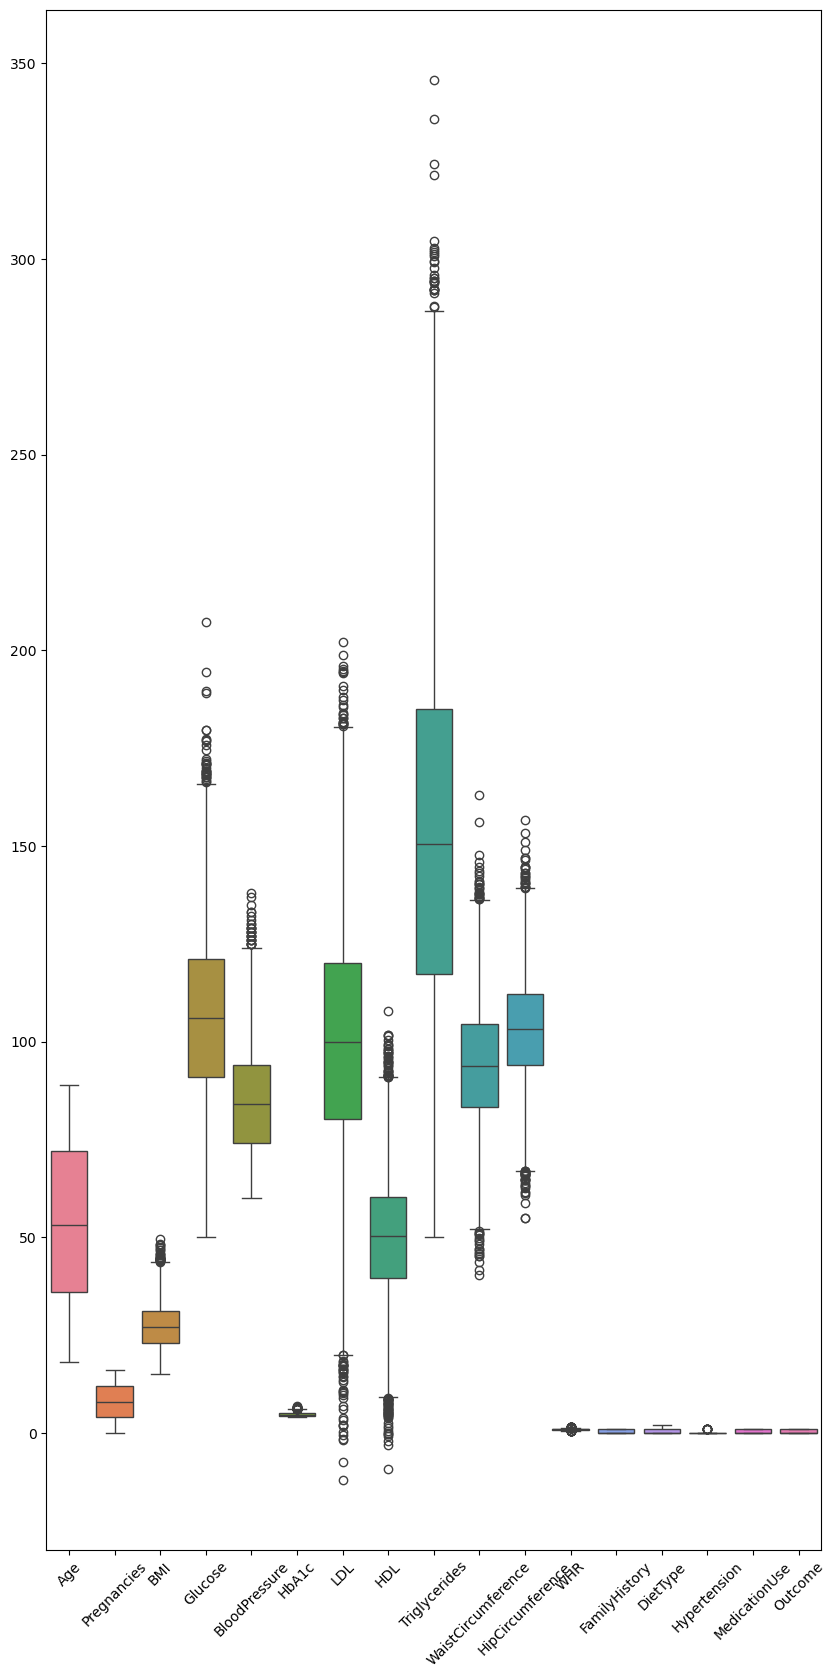

In [11]:
plt.figure(figsize=(10,20))
sns.boxplot(df)
plt.xticks(rotation = 45)

In [12]:
def handling_oultiers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - 1.5 * IQR
        Upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower = Lower_bound,upper = Upper_bound)
    return df

In [13]:
df = handling_oultiers(df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Pregnancies'),
  Text(2, 0, 'BMI'),
  Text(3, 0, 'Glucose'),
  Text(4, 0, 'BloodPressure'),
  Text(5, 0, 'HbA1c'),
  Text(6, 0, 'LDL'),
  Text(7, 0, 'HDL'),
  Text(8, 0, 'Triglycerides'),
  Text(9, 0, 'WaistCircumference'),
  Text(10, 0, 'HipCircumference'),
  Text(11, 0, 'WHR'),
  Text(12, 0, 'FamilyHistory'),
  Text(13, 0, 'DietType'),
  Text(14, 0, 'Hypertension'),
  Text(15, 0, 'MedicationUse'),
  Text(16, 0, 'Outcome')])

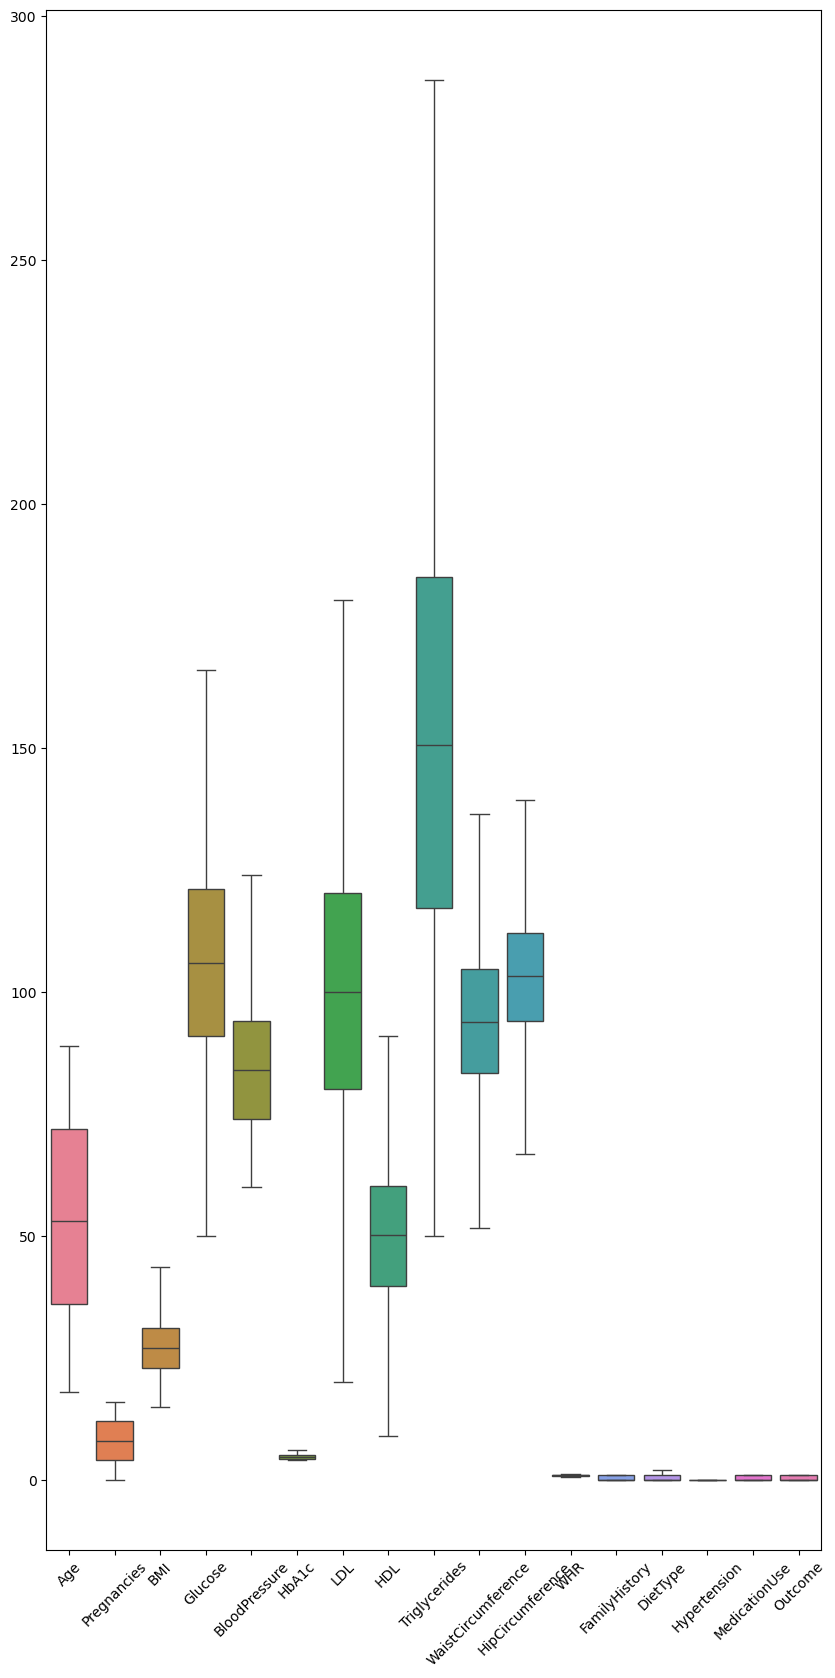

In [14]:
plt.figure(figsize=(10,20))
sns.boxplot(df)
plt.xticks(rotation = 45)

In [15]:
df.skew()

Age                   0.000062
Pregnancies           0.015817
BMI                   0.077806
Glucose               0.027397
BloodPressure         0.220782
HbA1c                 0.427435
LDL                  -0.001792
HDL                  -0.020556
Triglycerides         0.084996
WaistCircumference    0.028342
HipCircumference     -0.011627
WHR                   0.198260
FamilyHistory         0.860196
DietType              1.023083
Hypertension          0.000000
MedicationUse         0.387063
Outcome               0.656435
dtype: float64

In [16]:
X = df.drop(columns= 'Outcome')
y = df.Outcome

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

In [18]:
Ss = StandardScaler()
X_train_scaled = Ss.fit_transform(X_train)
X_test_scaled = Ss.fit_transform(X_test)

In [19]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Gradient boost Classifier' : GradientBoostingClassifier(),
    'SVC' : SVC(),
    'Gausian NB' : GaussianNB()
}

In [20]:
result = {}
for model_name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    result[model_name] = {'accuracy_score' : acc}
    

In [21]:
result_df = pd.DataFrame(result).T
result_df

,accuracy_score
Logistic Regression,0.995807
Decision Tree Classifier,0.997904
Gradient boost Classifier,0.997904
SVC,0.990566
Gausian NB,0.331761


In [35]:
pipeline = Pipeline([
    ('Imputer',SimpleImputer(strategy='mean')),
    ('Scaler', StandardScaler()),
    ('Model', LogisticRegression())
])

In [36]:
pipeline.fit(X_train_scaled,y_train)

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', StandardScaler()),
                ('Model', LogisticRegression())])

In [38]:
Y_pred = pipeline.predict(X_test_scaled)

In [40]:
#Accuracy on test data 
acc_test = accuracy_score(y_test,Y_pred)
acc_test

0.9958071278825996

In [41]:
joblib.dump(pipeline,'Diabetes_prediction_logisticRegression_model')

['Diabetes_prediction_logisticRegression_model']

In [42]:
loaded_pipeline = joblib.load('Diabetes_prediction_logisticRegression_model')